<a href="https://colab.research.google.com/github/Atharva-Parab2004/data-analysis-projects/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance matplotlib pandas

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
stock_symbol = "RELIANCE.NS"

df = yf.download(stock_symbol, start="2023-02-01", end="2024-02-01")

df.head()

/tmp/ipython-input-4156731434.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start="2023-02-01", end="2024-02-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-02-01,1068.156372,1086.439024,1052.224542,1086.439024,19347800
2023-02-02,1062.244751,1071.853911,1054.963591,1058.159038,13662663
2023-02-03,1063.180664,1072.310581,1046.746766,1072.310581,24699575
2023-02-06,1055.169189,1059.528758,1052.590035,1056.789734,14837879
2023-02-07,1052.635620,1062.450293,1046.746792,1055.420286,15135435


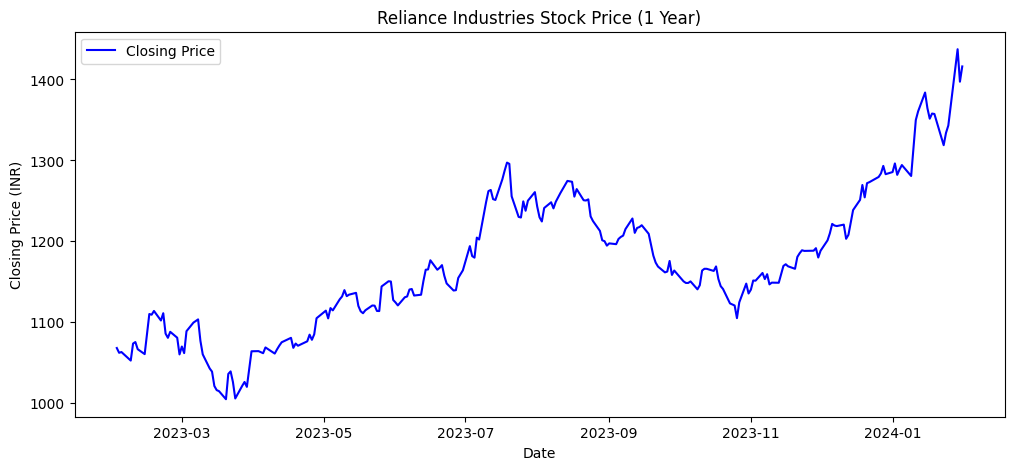

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title("Reliance Industries Stock Price (1 Year)")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.show()

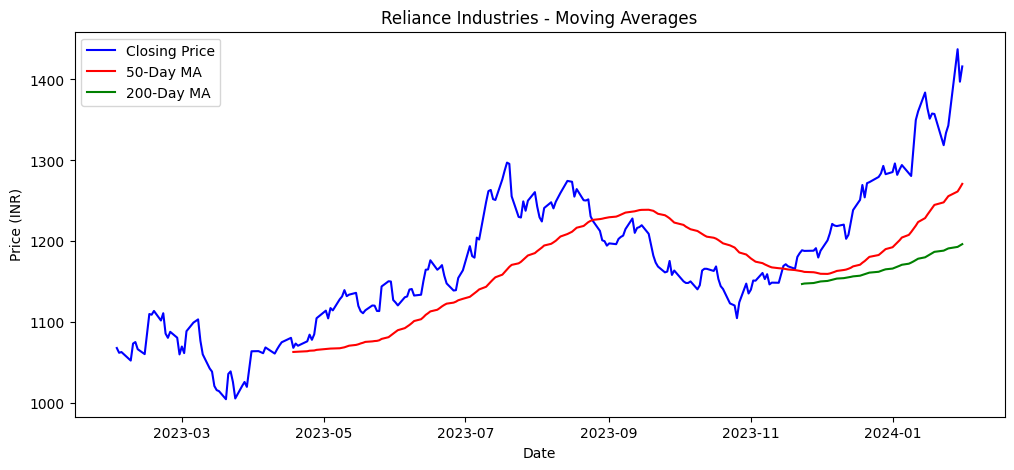

In [13]:
# Compute 50-day and 200-day moving averages
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

# Plot Moving Averages
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['50_MA'], label='50-Day MA', color='red')
plt.plot(df['200_MA'], label='200-Day MA', color='green')
plt.title("Reliance Industries - Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()

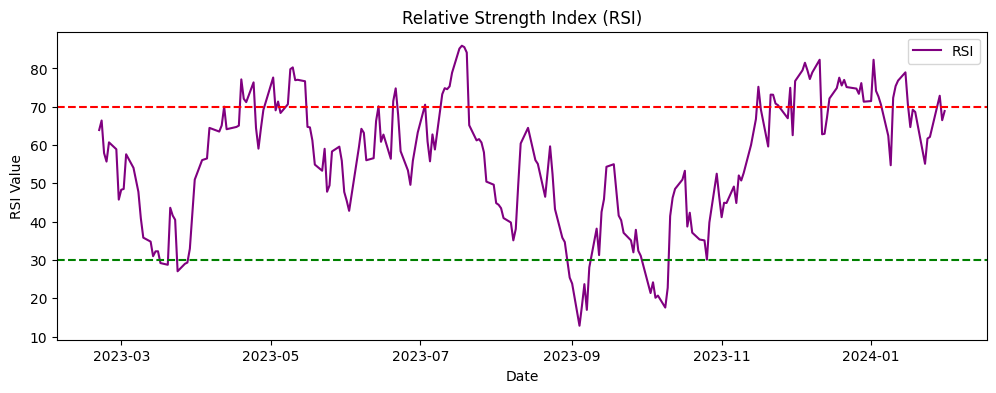

In [14]:
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df)

# Plot RSI
plt.figure(figsize=(12,4))
plt.plot(df['RSI'], label="RSI", color='purple')
plt.axhline(70, linestyle='--', color='red')  # Overbought threshold
plt.axhline(30, linestyle='--', color='green')  # Oversold threshold
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.show()

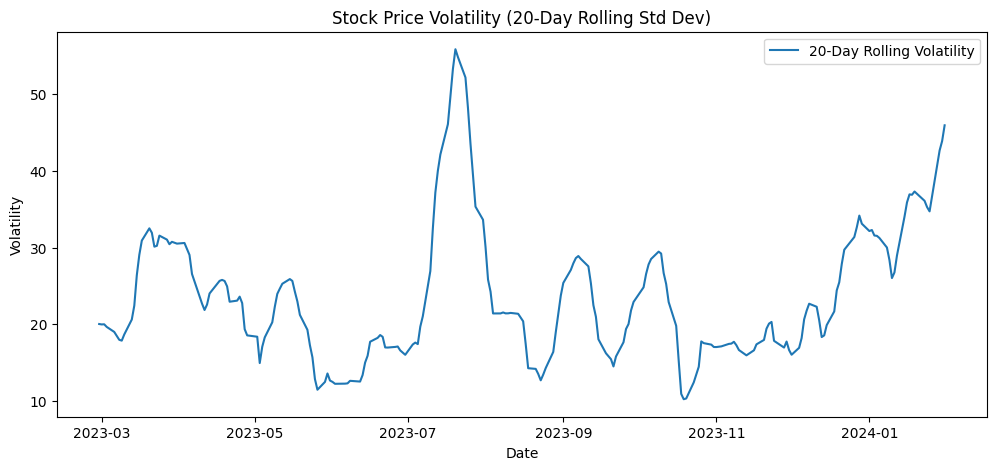

In [15]:
# Volatility (Rolling Standard Deviation)
df["Volatility_20"] = df['Close'].rolling(window=20).std()

plt.figure(figsize=(12,5))
plt.plot(df['Volatility_20'], label="20-Day Rolling Volatility")
plt.title("Stock Price Volatility (20-Day Rolling Std Dev)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [16]:
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df)

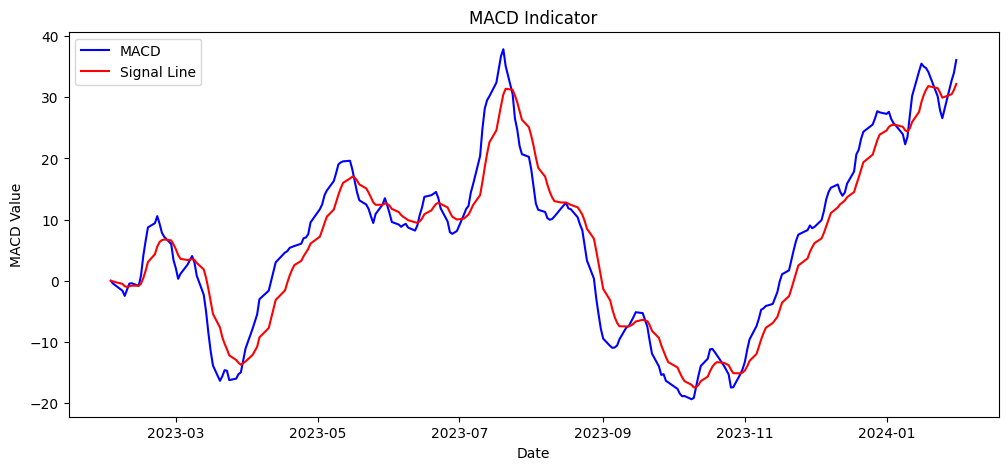

In [17]:
# MACD (Moving Average Convergence Divergence)
df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA_12"] - df["EMA_26"]
df["Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(12,5))
plt.plot(df["MACD"], label="MACD", color="blue")
plt.plot(df["Signal"], label="Signal Line", color="red")
plt.title("MACD Indicator")
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.legend()
plt.show()

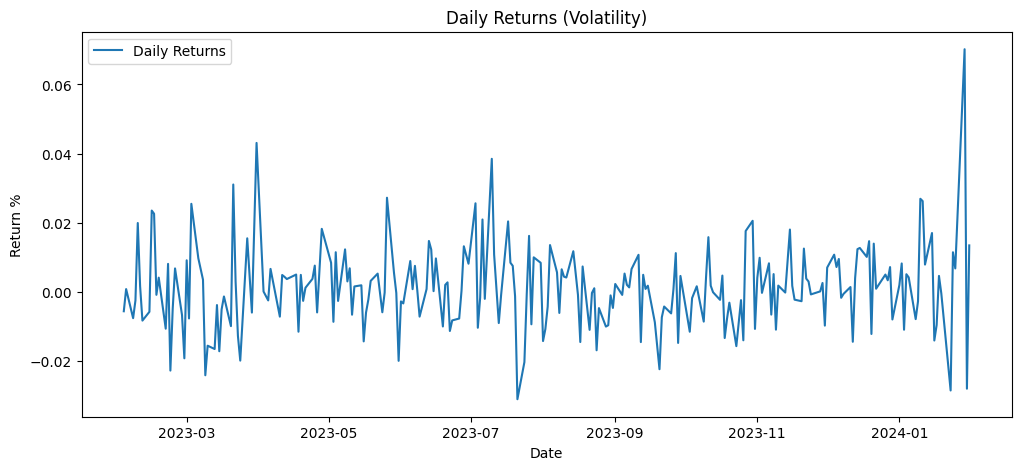

In [20]:
df["Daily_Return"] = df["Close"].pct_change()

plt.figure(figsize=(12,5))
plt.plot(df["Daily_Return"], label="Daily Returns")
plt.title("Daily Returns (Volatility)")
plt.xlabel("Date")
plt.ylabel("Return %")
plt.legend()
plt.show()

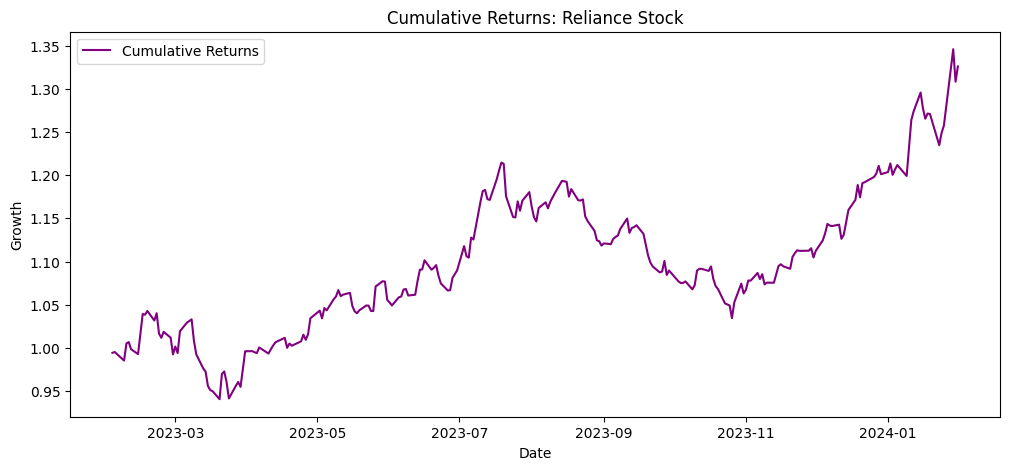

In [21]:
df["Cumulative_Returns"] = (1 + df["Daily_Return"]).cumprod()

plt.figure(figsize=(12,5))
plt.plot(df["Cumulative_Returns"], label="Cumulative Returns", color='purple')
plt.title("Cumulative Returns: Reliance Stock")
plt.xlabel("Date")
plt.ylabel("Growth")
plt.legend()
plt.show()

In [23]:
# Sharpe Ratio (Risk-adjusted performance)
risk_free_rate = 0.05 / 252  # Assuming 5% annual risk-free rate

df["Daily_Return"] = df["Close"].pct_change()
excess_return = df["Daily_Return"] - risk_free_rate

sharpe_ratio = (excess_return.mean() / excess_return.std()) * (252 ** 0.5)
sharpe_ratio

nan

/tmp/ipython-input-1914383179.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start="2023-02-01", end="2024-02-01")["Close"]
[*********************100%***********************]  4 of 4 completed


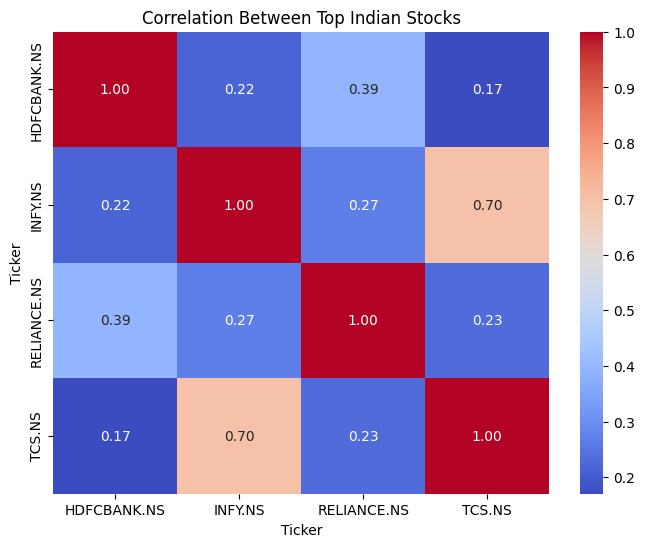

In [27]:
import seaborn as sns

# Download multiple stocks
symbols = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS"]
data = yf.download(symbols, start="2023-02-01", end="2024-02-01")["Close"]

# Correlation matrix
corr = data.pct_change().corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Top Indian Stocks")
plt.show()

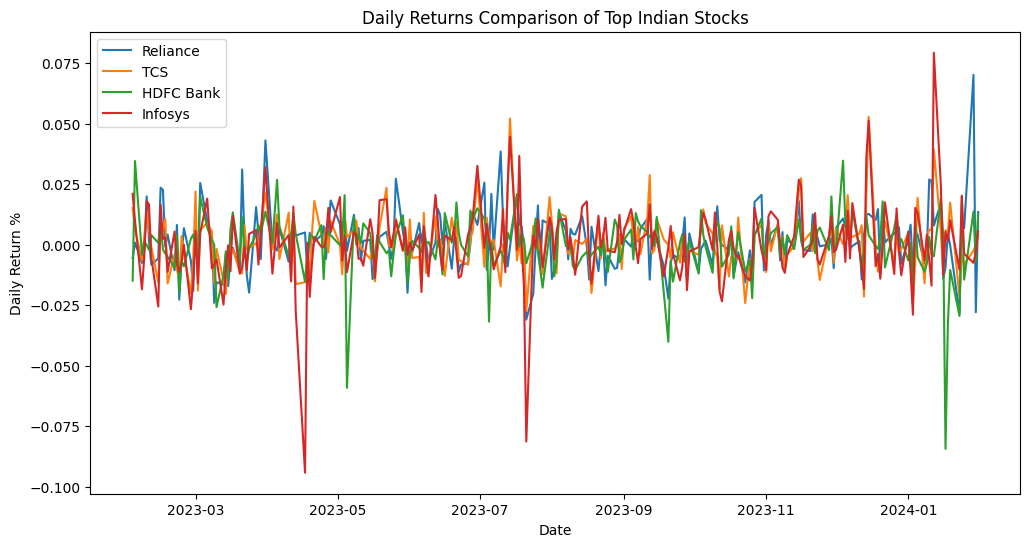

In [28]:
# Compare Daily Returns of multiple stocks
daily_returns = data.pct_change()

plt.figure(figsize=(12,6))
plt.plot(daily_returns["RELIANCE.NS"], label="Reliance")
plt.plot(daily_returns["TCS.NS"], label="TCS")
plt.plot(daily_returns["HDFCBANK.NS"], label="HDFC Bank")
plt.plot(daily_returns["INFY.NS"], label="Infosys")

plt.title("Daily Returns Comparison of Top Indian Stocks")
plt.xlabel("Date")
plt.ylabel("Daily Return %")
plt.legend()
plt.show()

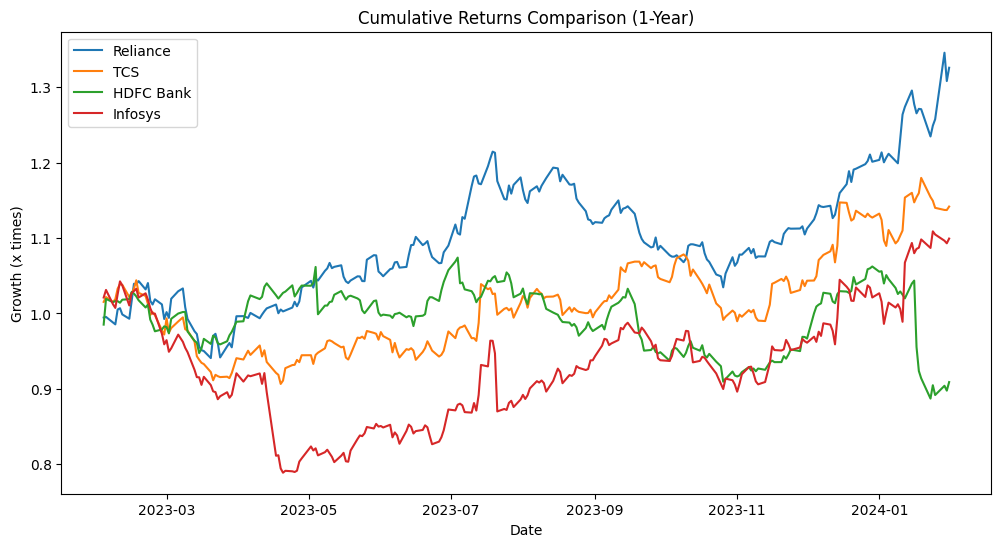

In [29]:
# Cumulative returns of all stocks
cumulative_returns = (1 + daily_returns).cumprod()

plt.figure(figsize=(12,6))
plt.plot(cumulative_returns["RELIANCE.NS"], label="Reliance")
plt.plot(cumulative_returns["TCS.NS"], label="TCS")
plt.plot(cumulative_returns["HDFCBANK.NS"], label="HDFC Bank")
plt.plot(cumulative_returns["INFY.NS"], label="Infosys")

plt.title("Cumulative Returns Comparison (1-Year)")
plt.xlabel("Date")
plt.ylabel("Growth (x times)")
plt.legend()
plt.show()

In [30]:
# Annualized volatility
volatility = daily_returns.std() * (252 ** 0.5)
volatility

,0
Ticker,
HDFCBANK.NS,0.191227
INFY.NS,0.247303
RELIANCE.NS,0.191172
TCS.NS,0.182002


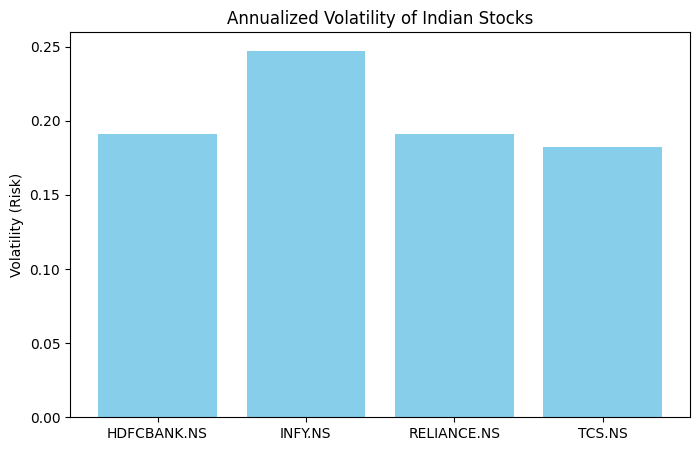

In [31]:
plt.figure(figsize=(8,5))
plt.bar(volatility.index, volatility.values, color="skyblue")
plt.title("Annualized Volatility of Indian Stocks")
plt.ylabel("Volatility (Risk)")
plt.show()

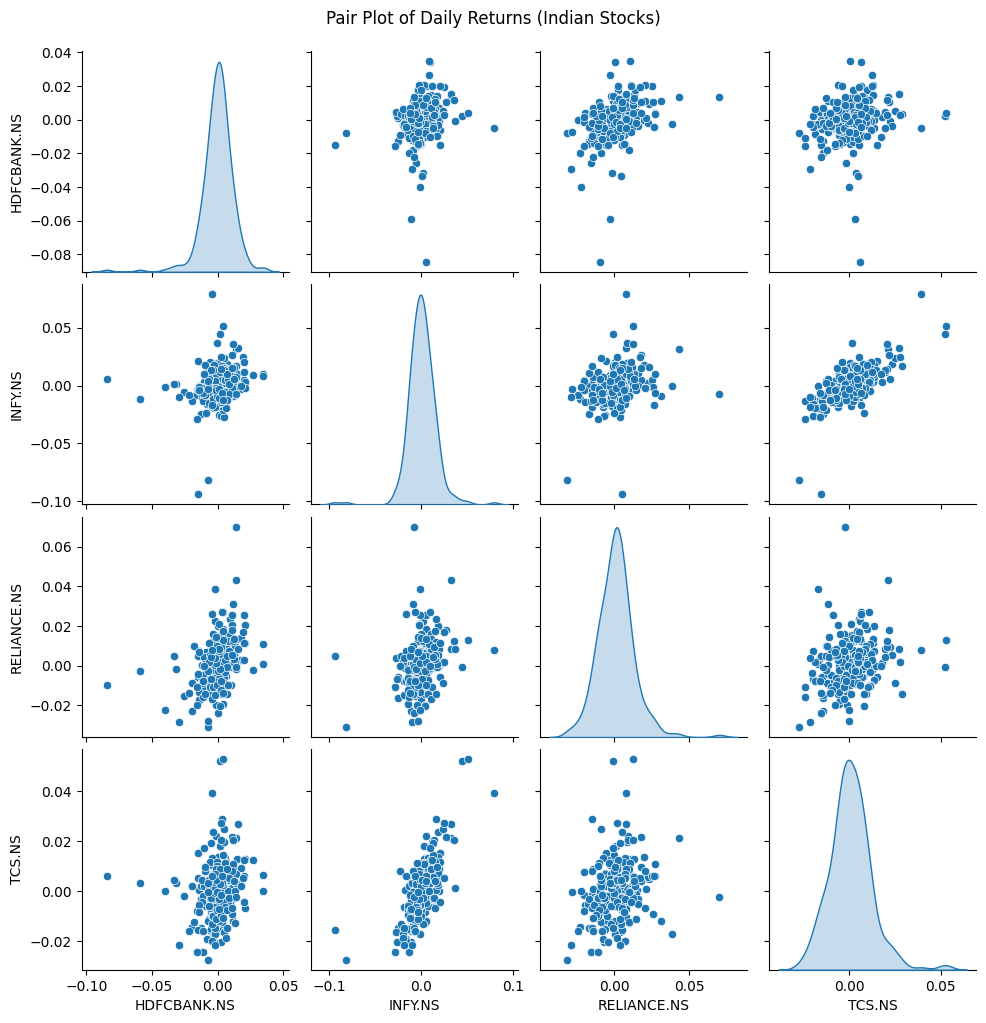

In [32]:
sns.pairplot(daily_returns.dropna(), diag_kind="kde")
plt.suptitle("Pair Plot of Daily Returns (Indian Stocks)", y=1.02)
plt.show()

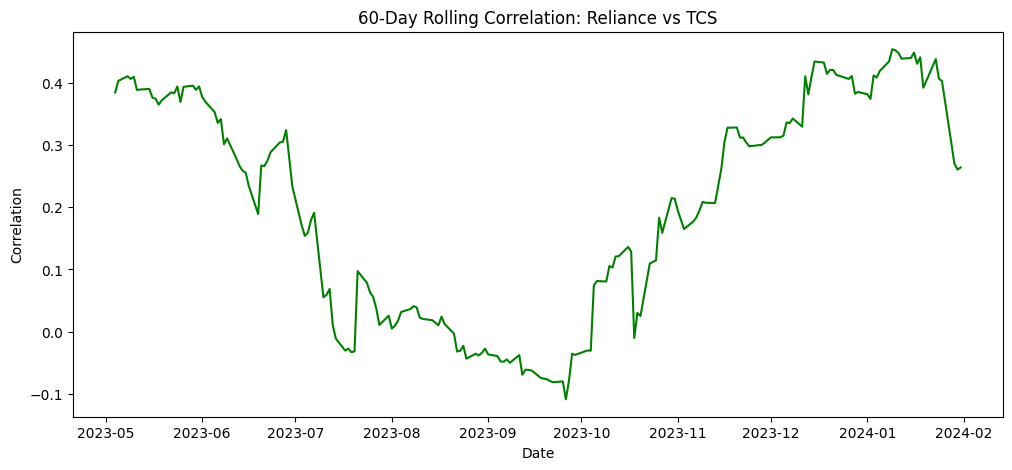

In [33]:
rolling_corr = (
    data["RELIANCE.NS"].pct_change().rolling(60)
    .corr(data["TCS.NS"].pct_change())
)

plt.figure(figsize=(12,5))
plt.plot(rolling_corr, color='green')
plt.title("60-Day Rolling Correlation: Reliance vs TCS")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.show()